## Administrative Staffing at the White House

#### Predict agency turnover by analyzing data from the Department of Labor and the Department of Commerce.
#### Present conclusions.

### Import Dependencies

In [1]:
# Dependencies and Setup
import pandas as pd
import hvplot.pandas
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

### Import & Display Datasets

In [2]:
# Load data for DoL and DoC
dol_data = pd.read_excel(
    "Resources/PlanA_final.xlsx",
    sheet_name="Department of Labor")
doc_data = pd.read_excel(
    "Resources/PlanA_final.xlsx",
    sheet_name="Department of Commerce")

In [3]:
# Display data
print(dol_data)

          RandomID agency   Q1   Q2   Q3   Q4   Q5   Q6   Q7 Q8  ...  DRNO  \
0     114016000000     DL  4.0  3.0  5.0  5.0  4.0  4.0  5.0  4  ...     B   
1     137377000000     DL  2.0  2.0  5.0  4.0  4.0  2.0  5.0  2  ...     B   
2     131212000000     DL  5.0  4.0  4.0  4.0  2.0  4.0  5.0  5  ...     B   
3     193260000000     DL  4.0  1.0  2.0  4.0  2.0  2.0  4.0  2  ...     B   
4     197278000000     DL  3.0  4.0  3.0  4.0  3.0  3.0  3.0  3  ...     B   
...            ...    ...  ...  ...  ...  ...  ...  ...  ... ..  ...   ...   
7545  105014000000     DL  5.0  5.0  5.0  5.0  5.0  5.0  5.0  5  ...     A   
7546  189629000000     DL  4.0  4.0  3.0  4.0  4.0  2.0  3.0  2  ...     C   
7547  125973000000     DL  4.0  4.0  4.0  4.0  4.0  4.0  4.0  X  ...     C   
7548  164714000000     DL  4.0  4.0  4.0  4.0  4.0  4.0  4.0  4  ...     B   
7549  177361000000     DL  4.0  4.0  4.0  4.0  4.0  4.0  4.0  1  ...     A   

      DHISP  DDIS DAGEGRP  DSUPER  DFEDTEN  DSEX  DMIL  DLEAVIN

In [ ]:
# Display data
# print(doc_data)

### Data Cleaning

In [4]:
# Create a list for Codebook, Demographic and Outcome variables
code_demo_out = ["Q2", "Q3", "Q4", "Q6", "Q7", "Q46", "Q48", "Q49", "Q50", "Q52",
     "Q55", "Q56", "Q57", "Q59", "Q60", "Q71", "Q72", "Q84","Q85", "Q86", "Q87", "Q88", "Q89", "DRNO", "DHISP", "DDIS", "DAGEGRP", "DSUPER", "DFEDTEN", "DSEX", "DMIL", "DLEAVING" ]

In [5]:
# Create a new dataframe using the code_demo_out list 
new_dol_data = pd.DataFrame(dol_data[code_demo_out])
print(new_dol_data)

       Q2   Q3   Q4   Q6   Q7 Q46  Q48  Q49  Q50  Q52  ...  Q89 DRNO DHISP  \
0     3.0  5.0  5.0  4.0  5.0   3  4.0  3.0  3.0  2.0  ...  4.0    B     B   
1     2.0  5.0  4.0  2.0  5.0   1  1.0  2.0  1.0  2.0  ...  5.0    B     B   
2     4.0  4.0  4.0  4.0  5.0   5  5.0  5.0  5.0  5.0  ...  4.0    B     B   
3     1.0  2.0  4.0  2.0  4.0   2  1.0  1.0  1.0  1.0  ...  5.0    B     B   
4     4.0  3.0  4.0  3.0  3.0   4  3.0  5.0  5.0  5.0  ...  3.0    B     A   
...   ...  ...  ...  ...  ...  ..  ...  ...  ...  ...  ...  ...  ...   ...   
7545  5.0  5.0  5.0  5.0  5.0   5  5.0  5.0  5.0  5.0  ...  5.0    A     B   
7546  4.0  3.0  4.0  2.0  3.0   4  4.0  4.0  3.0  2.0  ...  5.0    C     B   
7547  4.0  4.0  4.0  4.0  4.0   4  4.0  4.0  4.0  5.0  ...  4.0    C     B   
7548  4.0  4.0  4.0  4.0  4.0   4  4.0  4.0  4.0  4.0  ...  4.0    B     B   
7549  4.0  4.0  4.0  4.0  4.0   4  4.0  4.0  4.0  5.0  ...  4.0    A     B   

     DDIS DAGEGRP DSUPER DFEDTEN DSEX  DMIL  DLEAVING  
0      

In [6]:
# Empty DataFrame for value counts
df_codebook = pd.DataFrame()

In [7]:
# Create a list of columns to plot for initial dataframe
columns_for_plot = ["Q2", "Q3", "Q4", "Q6", "Q7", "Q46", "Q48", "Q49", "Q50", "Q52",
     "Q55", "Q56", "Q57", "Q59", "Q60", "Q71", "Q72", "Q85", "Q86", "Q87", "Q88", "Q89"]

In [8]:
# Loop through list and add counts to codebook DataFrame
for column in columns_for_plot:
    value = new_dol_data[column].value_counts()
    df_codebook[column] = value
df_codebook

Q2    Q3    Q4    Q6    Q7   Q46   Q48   Q49   Q50   Q52  ...   Q57  \
4.0  2790  3062  3489  2954  3350  2478  2189  2055  1949  1850  ...  3346   
5.0  2184  2608  2720  1871  3260  3432  4123  4511  4038  4316  ...  2058   
3.0  1200   977   646  1242   515   779   547   449   718   773  ...   988   
2.0   799   484   391   827   194   320   277   169   319   266  ...   442   
1.0   466   307   212   514   157   280   221   195   321   199  ...   406   

      Q59   Q60   Q71   Q72   Q85   Q86   Q87   Q88   Q89  
4.0  2268  2591  2568  2389  2734  3199  2498  3302  2875  
5.0  2777  2279  2421  2880  1900  2434  2083  2780  3907  
3.0  1096  1327   958   894  1566   942  1651   857   420  
2.0   410   527   360   226   724   422   652   166    37  
1.0   445   529   303   235   361   254   399   156    50  

[5 rows x 22 columns]

### Visualization of Question Response Frequency

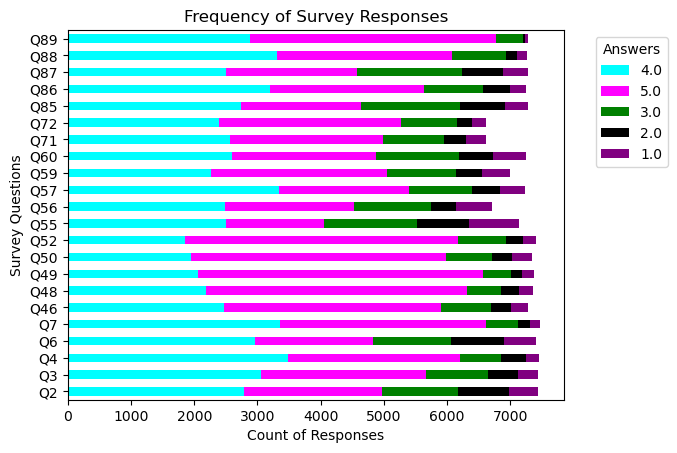

In [9]:
# Plot the DataFrame using a horizontal bar graph
custom_colors = ['cyan', 'magenta', 'green', 'black', 'purple']
df_transposed = df_codebook.T
df_transposed.plot(kind = "barh", stacked = True, color=custom_colors)
plt.title("Frequency of Survey Responses")
plt.xlabel("Count of Responses")
plt.ylabel("Survey Questions")
plt.legend(title="Answers", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Drop Rows with Blank Responses

In [10]:
# Calculate percent of missing values in each row
selected_data = new_dol_data
row_missing_percentage = pd.DataFrame(selected_data.isnull().mean(axis=1) * 100)
new_data_with_percentages = selected_data.copy()
new_data_with_percentages['row_missing_percentage'] = row_missing_percentage

# Save to file
new_data_with_percentages['row_missing_percentage'].to_csv('Resources/rowdrop_dol_output_file.csv', index=False)

In [11]:
# Set threshold
threshold_blank_rows = 0.25
selected_data = selected_data.dropna(thresh=len(selected_data.columns) * (1 - threshold_blank_rows))

# Save to file
selected_data.to_csv('Resources/25selected_dol_output_file.csv', index=False)

### Missing Values Handling

In [12]:
# Create a new dataframe to determine if each cell is blank (true=1) or not blank (false=0)
# Calculate the mean of each column
# Reset the index for the new dataframe
# Rename columns and sort the results
blank_dol_df = pd.DataFrame(new_dol_data.isnull().mean()).reset_index()
blank_dol_df.rename(columns={"index": "survey_questions", 0: "percent_of_missing_values"}, inplace=True)
sorted_results = blank_dol_df.sort_values(by='percent_of_missing_values', ascending=False)

# Display results
sorted_results

survey_questions  percent_of_missing_values
23             DRNO                   0.231656
24            DHISP                   0.163576
25             DDIS                   0.136821
26          DAGEGRP                   0.135629
29             DSEX                   0.134570
28          DFEDTEN                   0.076159
27           DSUPER                   0.075232
30             DMIL                   0.073113
31         DLEAVING                   0.069669
19              Q86                   0.039603
21              Q88                   0.038278
17              Q84                   0.037219
20              Q87                   0.035364
18              Q85                   0.035099
22              Q89                   0.034570
12              Q57                   0.027815
11              Q56                   0.027682
8               Q50                   0.027152
15              Q71                   0.026887
16              Q72                   0.026623
6               Q48                   0.025563
14              Q60                   0.025166
10              Q55                   0.023179
7               Q49                   0.022649
13              Q59                   0.021987
9               Q52                   0.019338
3                Q6                   0.018808
5               Q46                   0.016291
1                Q3                   0.014834
0                Q2                   0.014702
2                Q4                   0.012185
4                Q7                   0.009801

In [ ]:
# Using the results from the blank_dol_df, remove columns with high percent of missing values
# columns_to_remove = ["DRNO"]
# new_dol_data = new_dol_data.drop(columns=columns_to_remove)

### Impute and Aggregate Responses

In [13]:
# Replace null responses in DRNO variable to response value "D"
drno_to_recode = ["DRNO"]
drno_map = {None: "D"}

# Loop to replace Null/None cells with "D" response value
for column in drno_to_recode:
    new_dol_data[column].replace(drno_map, inplace=True)
    
# Save to file
new_dol_data.to_csv('Resources/recodeDRNO_dol_output_file.csv', index=False)

In [14]:
# Replace "X" responses to "Neither Agree nor Disagree"
columns_to_recode = ["Q46", "Q48", "Q49", "Q50", "Q52","Q55", "Q56", "Q57", "Q59", "Q60", "Q71", "Q72"]
recode_map = {"X": 3}

# Loop to replace "X" with 3
for column in columns_to_recode:
    new_dol_data[column].replace(recode_map, inplace=True)
    
# Save to file
new_dol_data.to_csv('Resources/recodeX_dol_output_file.csv', index=False)

In [15]:
# Replace missing values with the Mode of the column for that missing value
df_columns = new_dol_data.columns

for impute_column in df_columns:
    new_dol_data[impute_column].fillna(new_dol_data[impute_column].mode()[0], inplace=True)

### Q84

#### Plot Distribution of Numerical and Categorical Responses

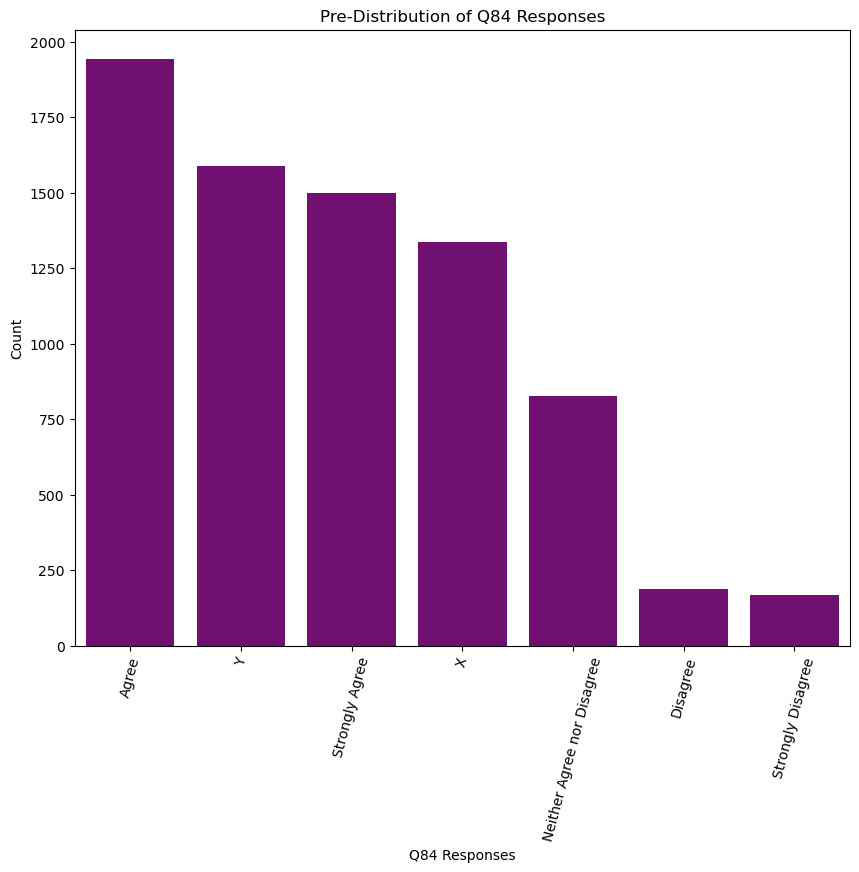

In [16]:
# Plot the distribution of values BEFORE recoding, in order of distribution value.

new_dol_data['Q84'].replace({1: 'Strongly Disagree',2: 'Disagree', 3: 'Neither Agree nor Disagree', 4: 'Agree', 5: 'Strongly Agree'},
                            inplace=True)

q84_values = new_dol_data['Q84']

order = q84_values.value_counts().index

plt.figure(figsize=(10, 8))
sns.countplot(x=q84_values, order=order, color='purple')
plt.title('Pre-Distribution of Q84 Responses')
plt.xlabel('Q84 Responses')
plt.xticks(rotation=75)
plt.ylabel('Count')
plt.show()

#### Aggregate Categorical Responses

In [17]:
# Replace "X & Y" responses to "Neither Agree nor Disagree"
xy_to_recode = ["Q84"]
xy_map = {"X": 3, "Y": 3}

# Loop to replace X and Y values with 3
for column in xy_to_recode:
    new_dol_data[column].replace(xy_map, inplace=True)

# Save to file
new_dol_data.to_csv('Resources/xy84_dol_output_file.csv', index=False)

### Review Plot Distribution After Re-coding of Categorical Responses

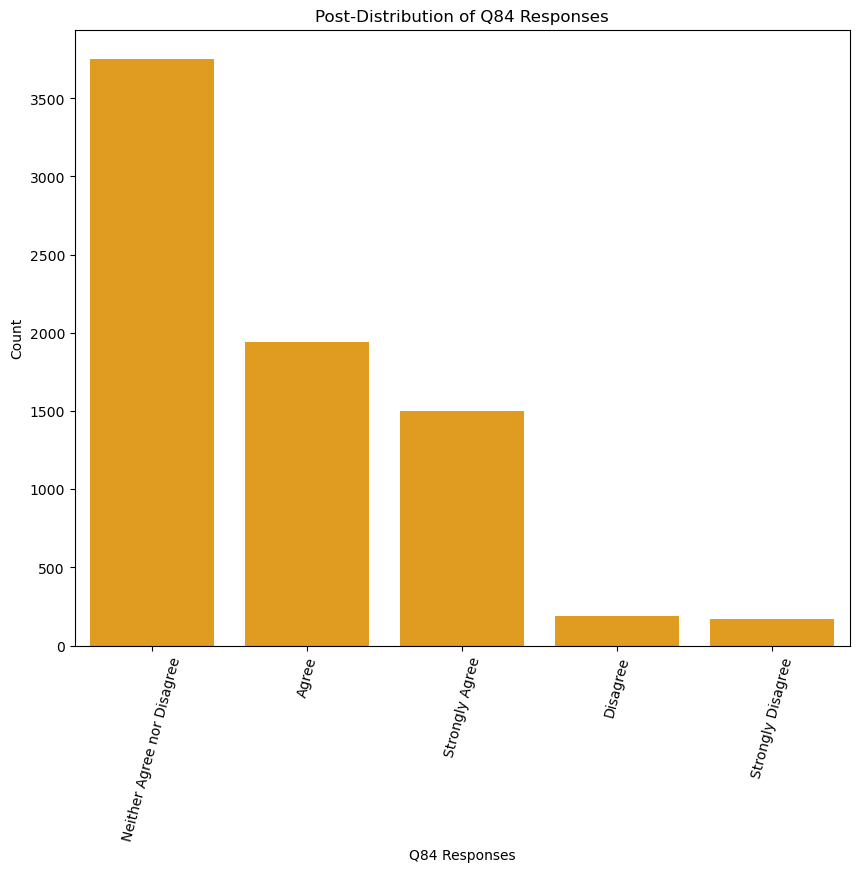

In [18]:
# Plot the distribution of dummy variables for each unique value

new_dol_data['Q84'].replace({1: 'Strongly Disagree',2: 'Disagree', 3: 'Neither Agree nor Disagree', 4: 'Agree', 5: 'Strongly Agree'},
                            inplace=True)

q84_postvalues = new_dol_data['Q84']

order = q84_postvalues.value_counts().index

plt.figure(figsize=(10, 8))
sns.countplot(x=q84_values, order=order, color='orange')
plt.title('Post-Distribution of Q84 Responses')
plt.xlabel('Q84 Responses')
plt.xticks(rotation=75)
plt.ylabel('Count')
plt.show()

### Assign Dummies for Demographic Variables

In [25]:
# Get dummies for categorical variables
# new_dol_data["Q84"].replace({'Strongly Disagree': 1, 'Disagree': 2, 'Neither Agree nor Disagree': 3, 'Agree': 4, 'Strongly Agree': 5},
#                            inplace=True)
demo_variables = ["DHISP", "DDIS", "DAGEGRP", "DSUPER", "DFEDTEN", "DSEX", "DMIL", "DRNO", "Q84"]
dummy_df = pd.get_dummies(new_dol_data[demo_variables], prefix=demo_variables)

# Update DataFrame with dummies and drop old columns
new_dol_data = pd.concat([new_dol_data, dummy_df], axis=1)
new_dol_data = new_dol_data.drop(columns=demo_variables)

KeyError: "None of [Index(['DHISP', 'DDIS', 'DAGEGRP', 'DSUPER', 'DFEDTEN', 'DSEX', 'DMIL', 'DRNO',\n       'Q84'],\n      dtype='object')] are in the [columns]"

### Create Binary Variables for "DLEAVING"

In [20]:
# Replace Outcome variable "DLEAVING" with 1 for leaving and 0 for staying
outcome_to_recode = ["DLEAVING"]
outcome_map = {"A": 0, "B": 1, "C": 1, "D": 1}

# Loop to replace alpha values with numerical values
for column in outcome_to_recode:
    new_dol_data[column].replace(outcome_map, inplace=True)

# Save to file
new_dol_data.to_csv('Resources/outcome_dol_output_file.csv', index=False)

### Rename Department of Labor Variables

In [21]:
# Give meaningful names to variables
new_column_names = {'DAGEGRP': 'Age_Group','DDIS': 'Disabled_Y_N','DRNO': 'Race','DFEDTEN': 'Fed_Service',
    'DHISP': 'Hispanic_Latino_Y_N','DMIL': 'Military_Status_Y_N','DSEX': 'Sex_M_F','DSUPER': 'Supervisor_Y_N',
    'DLEAVING': 'Leaving_Y_N','Q71': 'DEI_Practice','Q72': 'DEI_Commitment','Q84': 'DEI_Accessibility',
    'Q85': 'E_Inspiration','Q86': 'E_Accomplishment','Q87': 'E_Attachment','Q88': 'E_Mission','Q89': 'E_Contribution',
    'Q55': 'L_Motivation_Commitment','Q56': 'L_Honesty_Integrity','Q57': 'L_Goal_Communication','Q59': 'L_Performance',
    'Q60': 'L_Respect','Q46': 'S_Support_Development','Q48': 'S_Actively_Listens','Q49': 'S_Treats_Respect',
    'Q50': 'S_Trust_Confidence','Q52': 'S_Performance','Q2': 'W_Process_Improvements','Q3': 'W_Accomplishment',
    'Q4': 'W_Expectations','Q6': 'W_Talent_Use','Q7': 'W_Goal_Knowledge'
}

new_dol_data.rename(columns=new_column_names, inplace=True)

# Save to file
new_dol_data.to_csv('Resources/newnames_dol_output_file.csv', index=False)

### Variable Relationship Correlations

#### Correlation Matrix:  Heatmap 1

<Axes: >

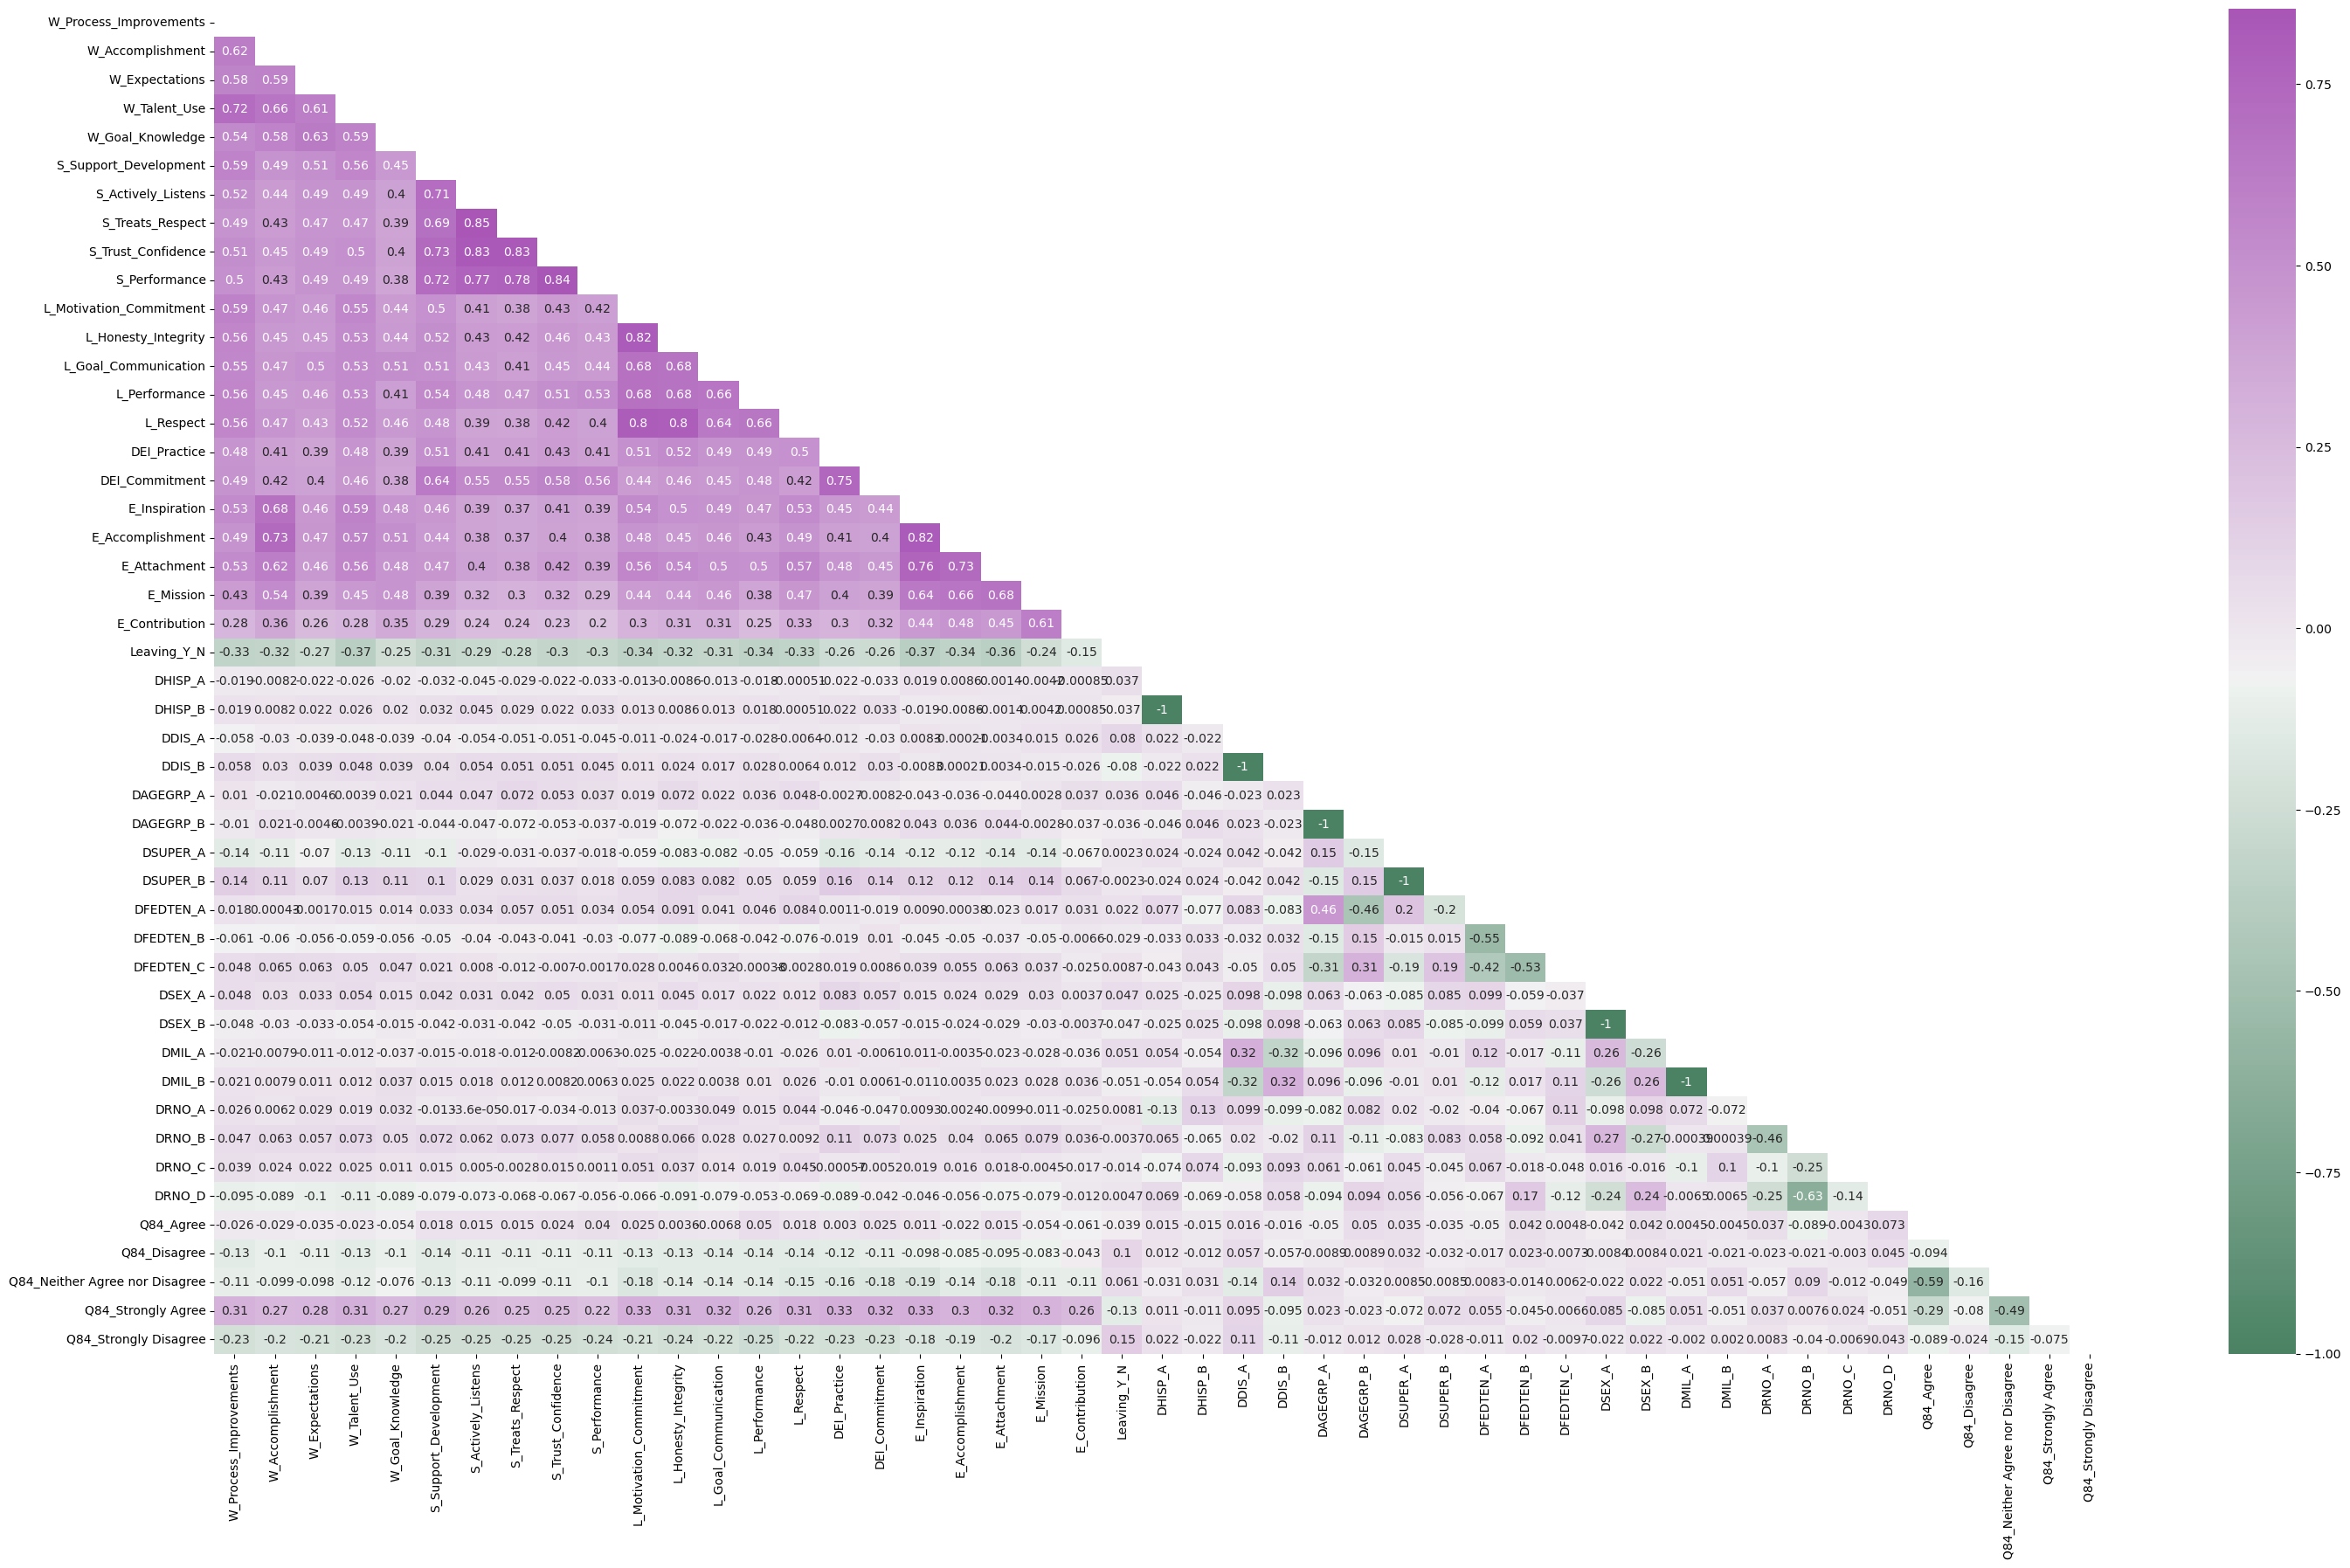

In [22]:
# Create a correlation matrix using a Heatmap
# corr_df = new_dol_data
corr_df = pd.read_csv('Resources/newnames_dol_output_file.csv')
column_names = corr_df.columns.tolist()

# Correlation between different variables
#
corr = corr_df.corr()
#
# Set up the matplotlib plot configuration
#
f, ax = plt.subplots(figsize=(35, 20))
#
# Generate a mask for upper traingle
#
mask = np.triu(np.ones_like(corr, dtype=bool))
#
# Configure a custom diverging colormap
#
cmap = sns.diverging_palette(145, 300, s=60, as_cmap=True)
#
# Draw the heatmap
#
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

#### Correlation Matrix: Heatmap 2

<Axes: >

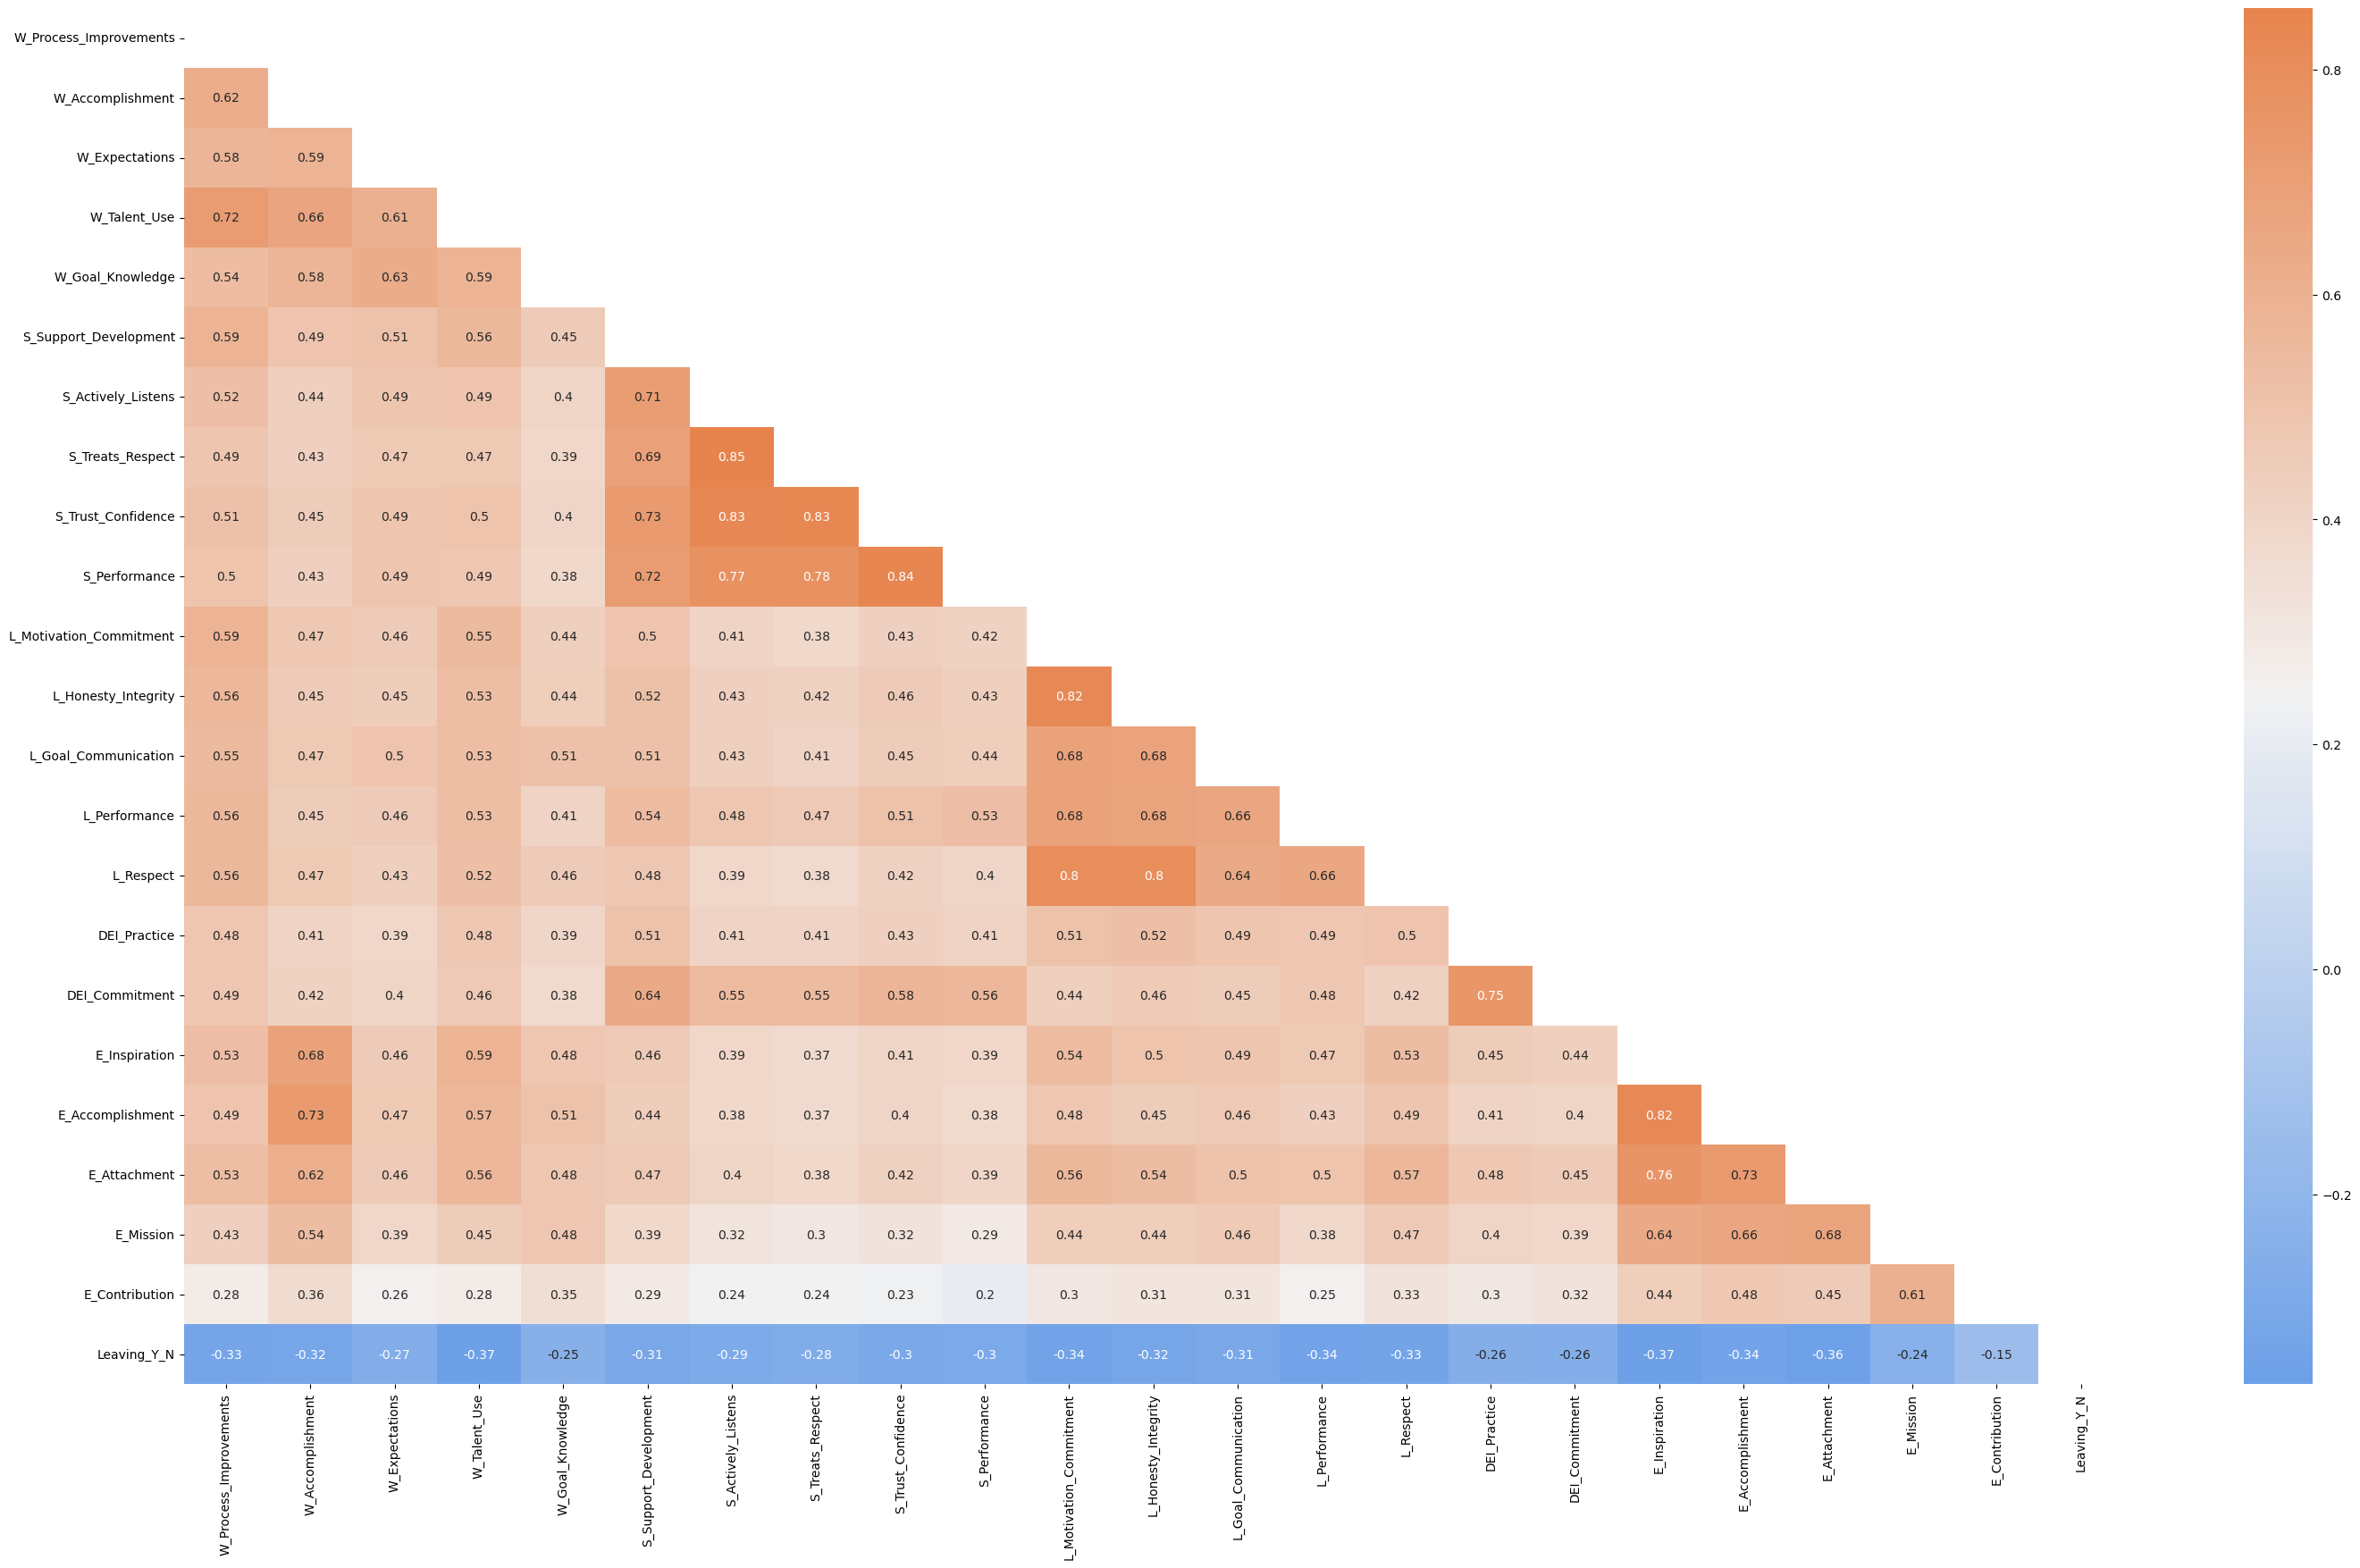

In [26]:
# Create a correlation matrix using a Heatmap
# corr_df = new_dol_data
corr_df = pd.read_csv('Resources/newnames_dol_output_file.csv')
column_names = corr_df.columns.tolist()

# Specify columns to remove
columns_to_remove = ["DHISP_A","DHISP_B","DDIS_A","DDIS_B","DAGEGRP_A","DAGEGRP_B","DSUPER_A","DSUPER_B",
                    "DFEDTEN_A","DFEDTEN_B","DFEDTEN_C","DSEX_A","DSEX_B","DMIL_A","DMIL_B","DRNO_A",
                    "DRNO_B","DRNO_C","DRNO_D", "Q84_Agree", "Q84_Disagree","Q84_Neither Agree nor Disagree",
                    "Q84_Strongly Agree", "Q84_Strongly Disagree"]

# Drop the specified columns
corr_df = corr_df.drop(columns=columns_to_remove)

# Correlation between different variables
#
corr = corr_df.corr()
#
# Set up the matplotlib plot configuration
#
f, ax = plt.subplots(figsize=(35, 20))
#
# Generate a mask for upper traingle
#
mask = np.triu(np.ones_like(corr, dtype=bool))
#
# Configure a custom diverging colormap
#
cmap = sns.diverging_palette(250, 30, l=65, as_cmap=True)
#
# Draw the heatmap
#
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

## Logistical Regression Analysis

### Confusion Matrix 1:  Penalty 'None'

#### Import Dependencies

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

#### Create Feature and Target Arrays

In [28]:
# Create Features and Target arrays
target = "Leaving_Y_N"
X = new_dol_data.drop(columns = [target,], axis=1)
y = new_dol_data[target]

#### Create Training and Testing Datasets

In [29]:
# Split the preprocessed data into a training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Run Logistical Regression Model

In [30]:
# Run logistic regression on the training data with penalty='none'
model = LogisticRegression(penalty='none', random_state=42, max_iter=500)

#### Fit Logistical Regression Model

In [31]:
# Fit training model
model.fit(X_train, y_train)

# Fit the model on the test data
y_pred = model.predict(X_test)

# Calculate different fit measures
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

/Users/marvinalarry/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


#### Display Logistical Regression Model Results

In [33]:
# Display results
from tabulate import tabulate

metrics_data = [
    ("Accuracy", accuracy),
    ("Precision", precision),
    ("Recall", recall),
    ("F1 Score", f1),
]
print(tabulate(metrics_data, headers=["Metric", "Value"], tablefmt="grid"))

+-----------+----------+
| Metric    |    Value |
+===========+==========+
| Accuracy  | 0.783444 |
+-----------+----------+
| Precision | 0.753191 |
+-----------+----------+
| Recall    | 0.396861 |
+-----------+----------+
| F1 Score  | 0.519824 |
+-----------+----------+


#### Confusion Matrix #1

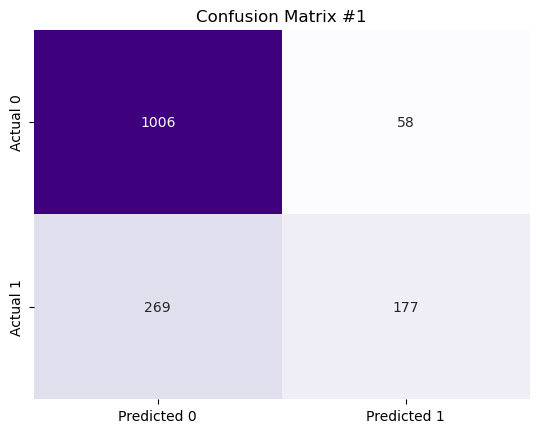

In [34]:
from sklearn.metrics import confusion_matrix

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.title('Confusion Matrix #1')
plt.show()

### Confusion Matrix 2:  Balanced Class Weight

#### Create Training and Testing Datasets

In [35]:
# Split preprocessed data into a training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Run Logistical Regression Model2

In [36]:
# Run logistic regression on the training data with balanced class_weight
model2 = LogisticRegression(class_weight="balanced", random_state=42, max_iter=500)

#### Fit Logistical Regression Model2

In [37]:
# Fit training model2
model2.fit(X_train, y_train)

# Fit model2 on the test data
y_pred = model2.predict(X_test)

# Calculate different fit measures
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

#### Display Logistical Regression Model2 Results

In [38]:
# Display results
from tabulate import tabulate

metrics_data = [
    ("Accuracy", accuracy),
    ("Precision", precision),
    ("Recall", recall),
    ("F1 Score", f1),
]
print(tabulate(metrics_data, headers=["Metric", "Value"], tablefmt="grid"))

+-----------+----------+
| Metric    |    Value |
+===========+==========+
| Accuracy  | 0.758278 |
+-----------+----------+
| Precision | 0.580517 |
+-----------+----------+
| Recall    | 0.654709 |
+-----------+----------+
| F1 Score  | 0.615385 |
+-----------+----------+


#### Confusion Matrix #2

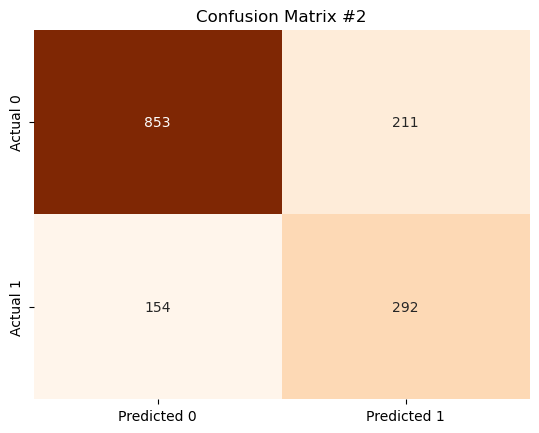

In [40]:
# Create a confusion matrix
conf_matrix2 = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Oranges', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.title('Confusion Matrix #2')
plt.show()

## Random Forest Classification

### Create Training and Testing Datasets for Random Forest

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
%matplotlib inline

# Split the preprocessed data into a training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

# Create StandardScaler instance
scaler = StandardScaler()

# Fit Standard Scaler
X_scaler = scaler.fit(X_train)

# Scale data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Fit Random Forest Model

In [43]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

# Fit the model
rf_model = rf_model.fit(X_train_scaled, y_train)

### Make Predictions Using Random Forest Model

In [44]:
# Make predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

### Evaluate Random Forest Model

In [45]:
# Calculate the confusion matrix
conf_matrix3 = confusion_matrix(y_test, predictions)
conf_matrix_df = pd.DataFrame(
    conf_matrix3, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculate the accuracy score
acc_score = accuracy_score(y_test, predictions)

### Display Random Forest Confusion Matrix and Classification Report

In [48]:
# Displaying results
print("Confusion Matrix: Random Forest")
display(conf_matrix_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix: Random Forest


Predicted 0  Predicted 1
Actual 0         1210          108
Actual 1          325          245

Accuracy Score : 0.770656779661017
Classification Report
              precision    recall  f1-score   support

           0       0.79      0.92      0.85      1318
           1       0.69      0.43      0.53       570

    accuracy                           0.77      1888
   macro avg       0.74      0.67      0.69      1888
weighted avg       0.76      0.77      0.75      1888



### Feature Importance for Random Forrest

In [49]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.055199736067160235, 'E_Inspiration'),
 (0.052908001769533614, 'E_Attachment'),
 (0.05008811444391667, 'W_Talent_Use'),
 (0.04233080830152925, 'L_Motivation_Commitment'),
 (0.040835668653826915, 'L_Performance'),
 (0.038186795342604246, 'E_Accomplishment'),
 (0.03778150609803804, 'W_Process_Improvements'),
 (0.03526379874036677, 'L_Respect'),
 (0.033784491820483584, 'L_Honesty_Integrity'),
 (0.0329923490462983, 'W_Accomplishment'),
 (0.03167235412461399, 'DEI_Practice'),
 (0.031066485692273882, 'L_Goal_Communication'),
 (0.029803020909754653, 'S_Support_Development'),
 (0.027580981718757724, 'DEI_Commitment'),
 (0.026708930165161824, 'S_Performance'),
 (0.0265534641180834, 'W_Expectations'),
 (0.025522626557108515, 'S_Trust_Confidence'),
 (0.024617008766658784, 'S_Actively_Listens'),
 (0.022877312424562486, 'E_Mission'),
 (0.022064351394693257, 'W_Goal_Knowledge'),
 (0.021383479165244298, 'E_Contribution'),
 (0.020146329951202472, 'S_Treats_Respect'),
 (0.016116147028573346, 'DRNO_B

### Visualize by Significance of Survey Questions

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

<Figure size 3000x2000 with 0 Axes>

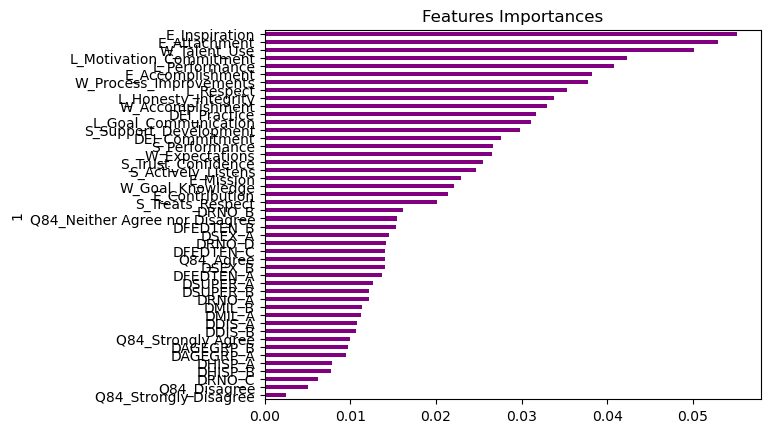

In [61]:
import matplotlib.pyplot as plt

# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
plt.figure(figsize=(12, 8))
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='purple', title= 'Features Importances', legend=False)